In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os
import glob
import awkward as ak
from scipy.stats import norm

In [2]:
data_path = "/home/haue/repositories/Masters/data/singleprotons/Al/inclbetacut/"
g_singlep_path = "/home/haue/repositories/Masters/data/gamma/Al/withbeta"

#outputdir = "/figure_output/"
## Load in all files from the datapath with the suffix mlio.root
Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
g_singlep_files = glob.glob(os.path.join(g_singlep_path, "*mlio.root"))

#Files to be analyzed 
Analysis_files = g_singlep_files

upscale = 1/0.34
scale =  4.993289447838043 # ratio between total solid angle coverage and solid angle coverage of id3 to account for lack of detection of beta particles

In [3]:
Egs1_b = np.array([])
Egs1_b_eff = np.array([])        
for batch in uproot.iterate(Analysis_files, expressions=["Eg1", "eff1"],
            cut=f"(Eg1>0) & (eff1>0)"):
    Egs1_b = np.append(Egs1_b, batch.Eg1)
    Egs1_b_eff = np.append(Egs1_b_eff, batch.eff1)
Egs1_b = Egs1_b[~np.isnan(Egs1_b)]
Egs1_b_eff = Egs1_b_eff[~np.isnan(Egs1_b_eff)]


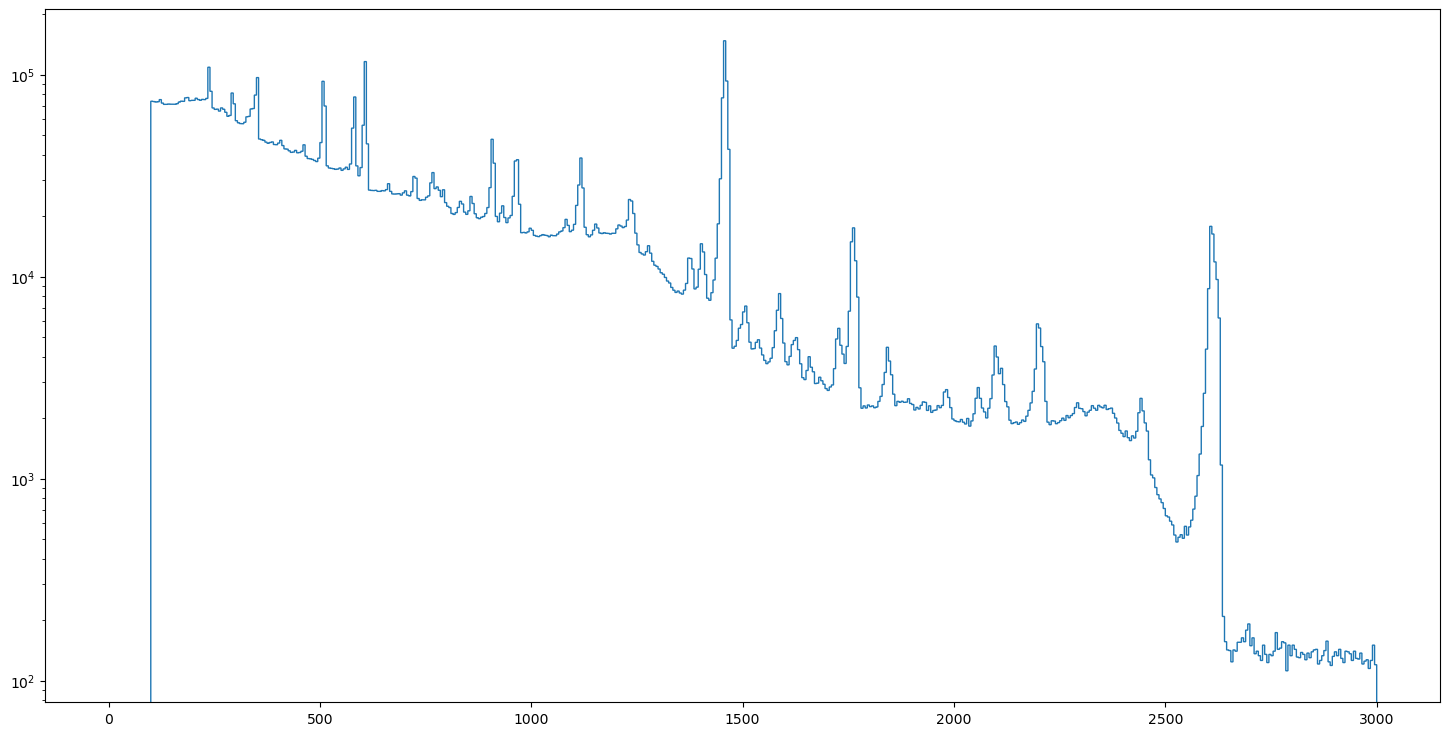

In [5]:
plt.figure(figsize=(18,9))
plt.hist(Egs1_b, bins=np.arange(0,3000+5,5), histtype='step')
plt.yscale('log')